<a href="https://colab.research.google.com/github/shovagelal/Open-source-Practice/blob/main/Swarming_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV files found: ['/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/36_2020-06-09 093000.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/97_2021-06-25 091320.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/48_2020-06-09 162400.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/86_2021-06-06 073320.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/79_2020-06-05 121320.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/112_2020-06-22 105240.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/123_2021-06-07 134820.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d/105_2020-06-05 113640.csv', '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_

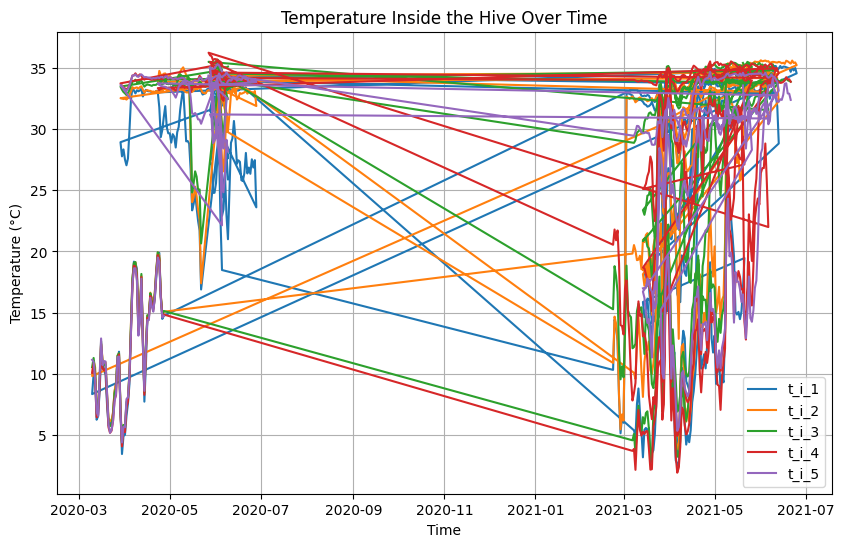

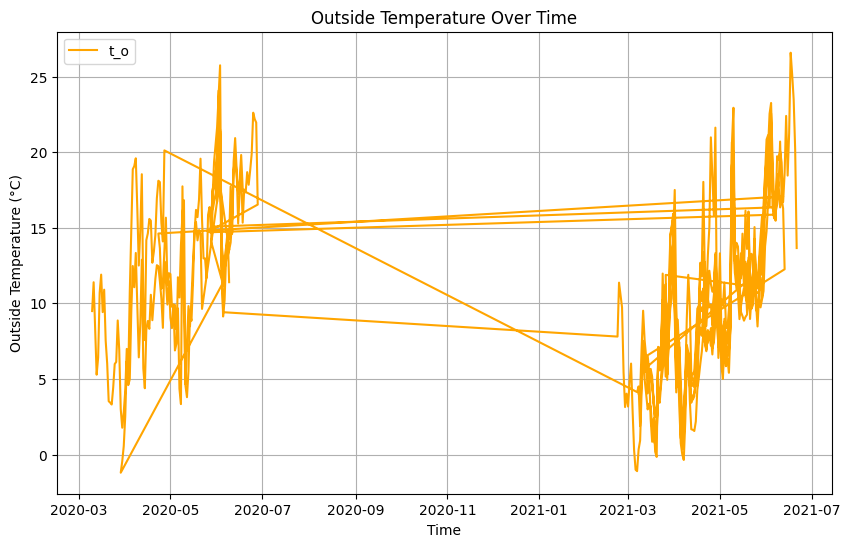

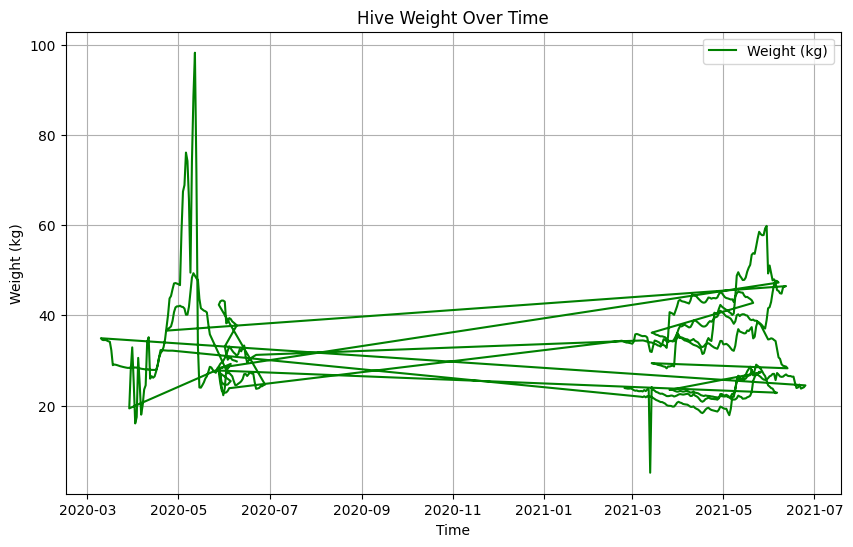

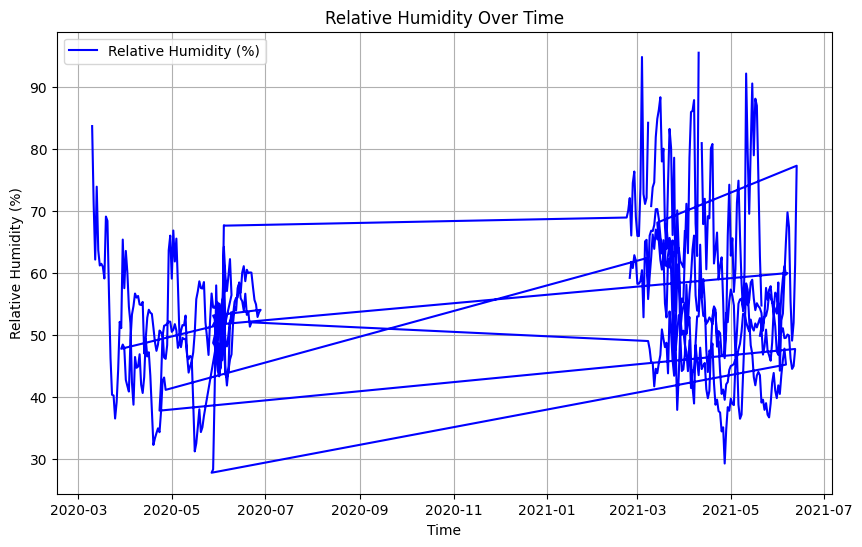

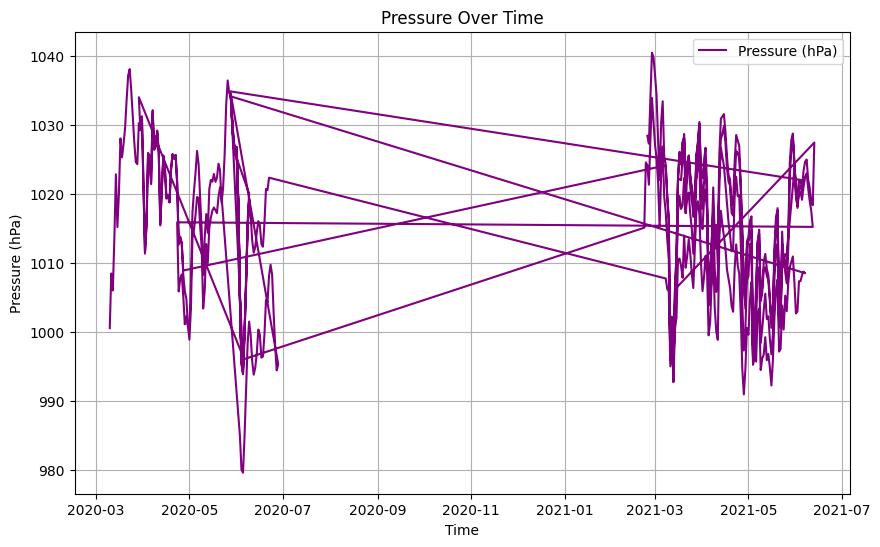

In [5]:
import numpy as no
import pandas as pd
import glob
import os

# Step 1: Set the directory where the CSV files are located
directory_path = '/content/drive/MyDrive/bob_publication_data/events/swarming/preprocessed/swarming_d'  # Replace with the actual path to your CSV files

# Step 2: Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Debug: Print the list of CSV files found
print("CSV files found:", csv_files)

# Step 3: Load each CSV file into a DataFrame and store them in a list
dataframes = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dataframes.append(df)
        # Debug: Print a success message for each file
        print(f"Successfully read {file}")
    except Exception as e:
        # Debug: Print an error message if a file cannot be read
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were loaded
if not dataframes:
    print("No DataFrames were loaded. Please check the directory path and CSV files.")
else:
    # Step 4: Concatenate all DataFrames in the list into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)

    # Step 5: Remove Unnecessary Columns (if needed)
    columns_to_remove = ["X", "uni_time", "numeric.time"]
    merged_df_cleaned = merged_df.drop(columns=columns_to_remove, errors='ignore')

    # Step 6: Save the merged DataFrame to a new CSV file
    output_file = 'merged_data.csv'  # Specify the path where you want to save the merged data
    merged_df_cleaned.to_csv(output_file, index=False)

    # Step 7: Print a summary of the merged data
    print("Summary of the merged data:")
    print(merged_df_cleaned.describe(include='all'))

    # Step 8: Visualize the merged data
    import matplotlib.pyplot as plt

    # Convert 'time' column to datetime for better plotting
    merged_df_cleaned['time'] = pd.to_datetime(merged_df_cleaned['time'])

    # Plotting temperature inside the hive
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_i_1'], label='t_i_1')
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_i_2'], label='t_i_2')
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_i_3'], label='t_i_3')
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_i_4'], label='t_i_4')
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_i_5'], label='t_i_5')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Inside the Hive Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting outside temperature
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['t_o'], label='t_o', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Outside Temperature (°C)')
    plt.title('Outside Temperature Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting hive weight
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['weight_kg'], label='Weight (kg)', color='green')
    plt.xlabel('Time')
    plt.ylabel('Weight (kg)')
    plt.title('Hive Weight Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting humidity
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['h'], label='Relative Humidity (%)', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Relative Humidity (%)')
    plt.title('Relative Humidity Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting pressure
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df_cleaned['time'], merged_df_cleaned['p'], label='Pressure (hPa)', color='purple')
    plt.xlabel('Time')
    plt.ylabel('Pressure (hPa)')
    plt.title('Pressure Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()



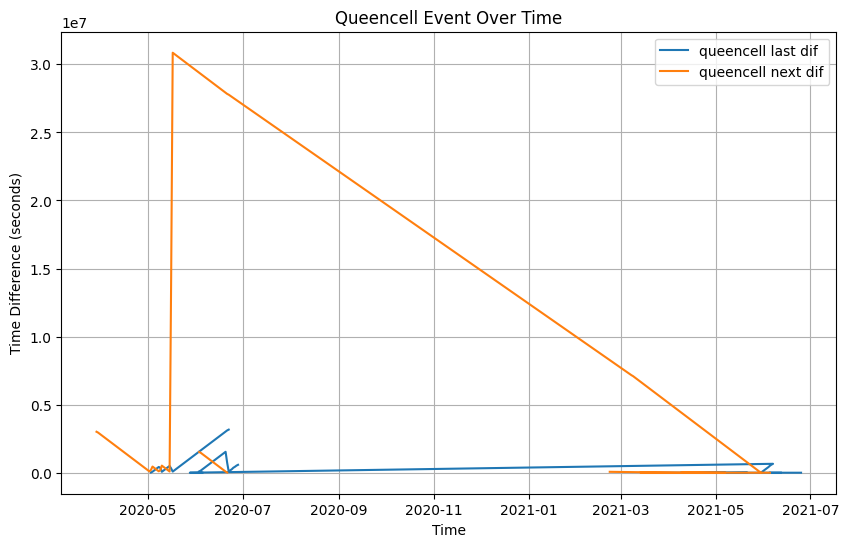

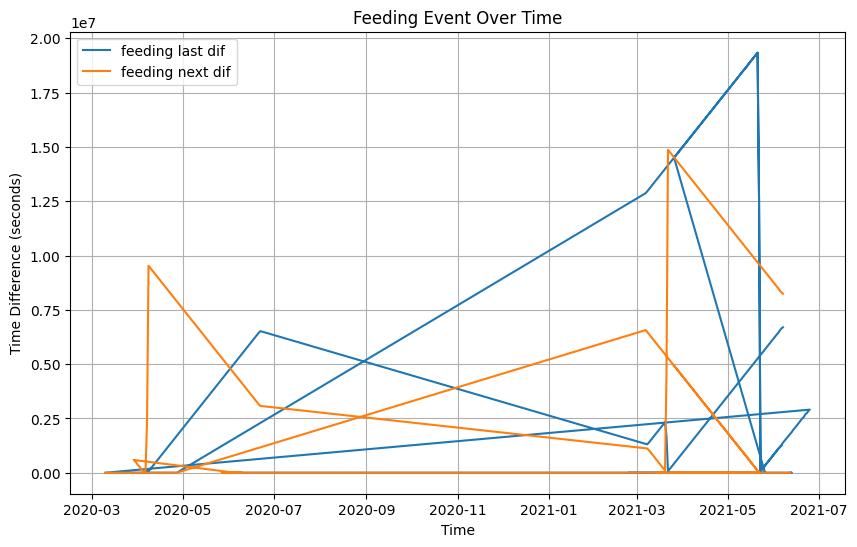

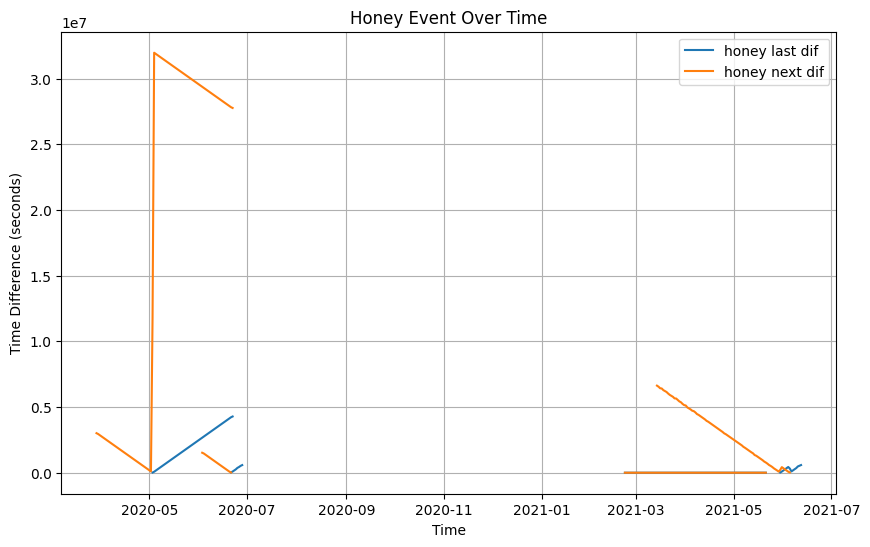

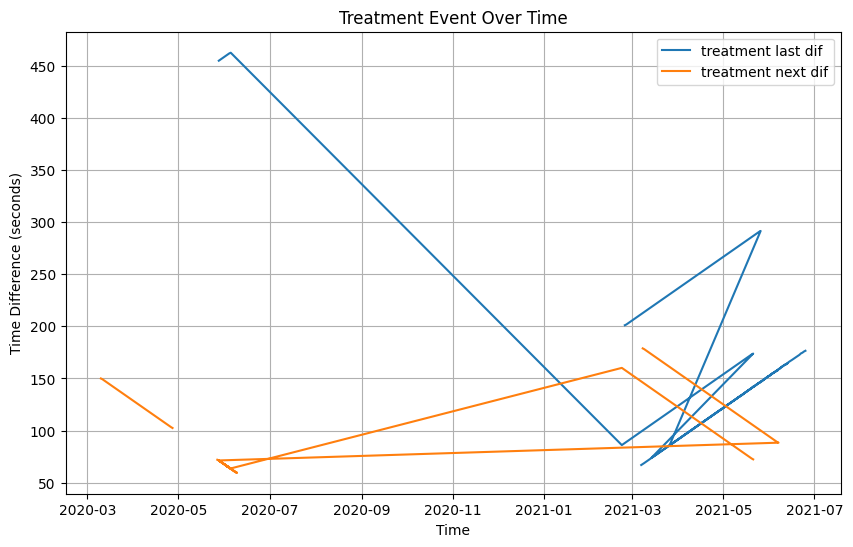

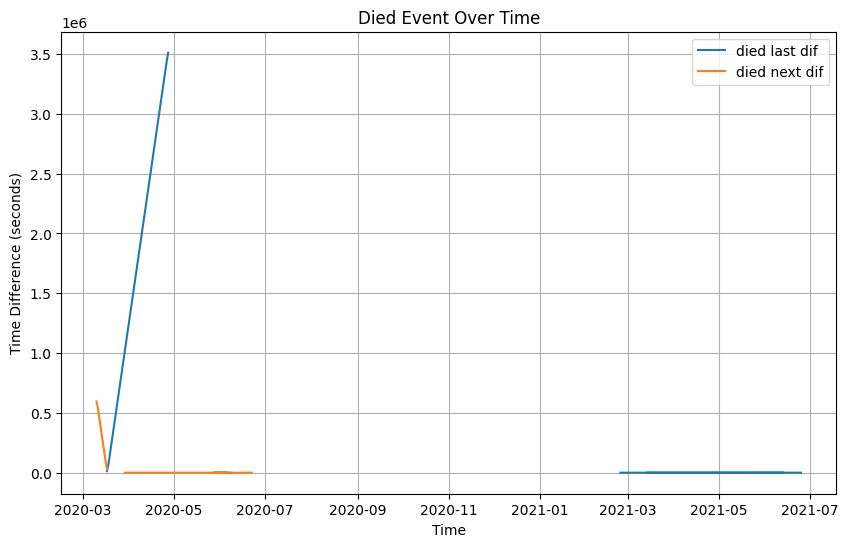

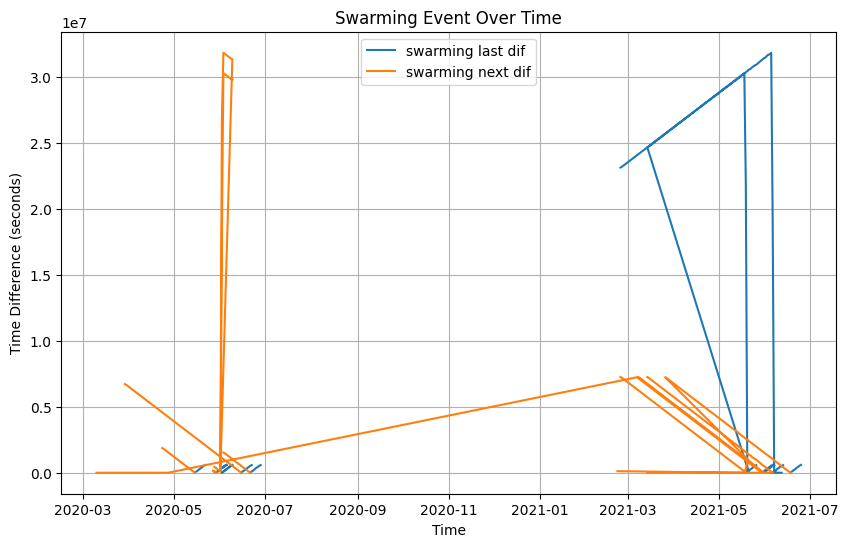

In [10]:
  # Plotting events: queen cell, feeding, honey, treatment, died, swarming
  events = ['queencell', 'feeding', 'honey', 'treatment', 'died', 'swarming']

  for event in events:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df_cleaned['time'], merged_df_cleaned[f'{event}.last.dif'], label=f'{event} last dif')
        plt.plot(merged_df_cleaned['time'], merged_df_cleaned[f'{event}.next.dif'], label=f'{event} next dif')
        plt.xlabel('Time')
        plt.ylabel('Time Difference (seconds)')
        plt.title(f'{event.capitalize()} Event Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()